In [1]:
import pandas as pd
import quickplot as qplt
from defillama2 import DefiLlama
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 15)
pd.set_option('display.max_rows', 50)
pd.options.display.float_format = '{:,.4f}'.format

%matplotlib inline
plt.style.use("fivethirtyeight")

# Makes graphs crisp. Only use if you don't have a lot of points/lines on your graph.
%config InlineBackend.figure_formats = ['svg', 'retina'] # use svg, then retina if svg is not supported

## Get historical APY and TVL of a pool

In [2]:
obj = DefiLlama()

In [3]:
# get pool ids
dat = obj.get_pools_yields()
pool_ids = dat.pool
pool_ids

0       747c1d2a-c668-4682-b9f9-296708a3dd90
1       051c1a54-df05-4bc4-9d73-c17508acae23
2       71418c17-d2aa-4eff-b68a-806fff9ec951
3       57d30b9c-fc66-4ac2-b666-69ad5f410cce
4       0e458a5b-fd99-4667-8706-dd938934cb0c
                        ...                 
9973    02c7140a-cea4-44f9-9b6f-45444da7e8a2
9974    483cd298-5ae5-4576-8b67-1c3d1ba98157
9975    73b0e9e9-c358-48b1-a382-0ec051b27695
9976    8e91c2b5-1a00-4579-ac06-7036fe83cefa
9977    a996fae6-0c8c-442a-94aa-20e1adf0a4c9
Name: pool, Length: 9978, dtype: object

In [4]:
pool_id = pool_ids[10]
meta = dat.loc[dat.pool == pool_id, ['chain', 'project', 'symbol']]
meta

,chain,project,symbol
10,Ethereum,curve,FRAX-USDC


In [5]:
df = obj.get_pool_hist_apy(pool_id)
df.head()

,tvlUsd,apy,apyBase,apyReward
date,,,,
2022-07-20,"372,228,682.0000",3.6623,0.2130,3.4493
2022-07-21,"375,740,673.0000",4.4075,0.3515,4.0560
2022-07-22,"381,982,059.0000",4.2450,0.0759,4.1691
2022-07-23,"389,592,835.0000",4.0908,0.1751,3.9157
2022-07-24,"395,236,172.0000",3.9079,0.0805,3.8273


In [6]:
fig_tit = ', '.join(meta.values.tolist()[0])
print(fig_tit)

Ethereum, curve, FRAX-USDC


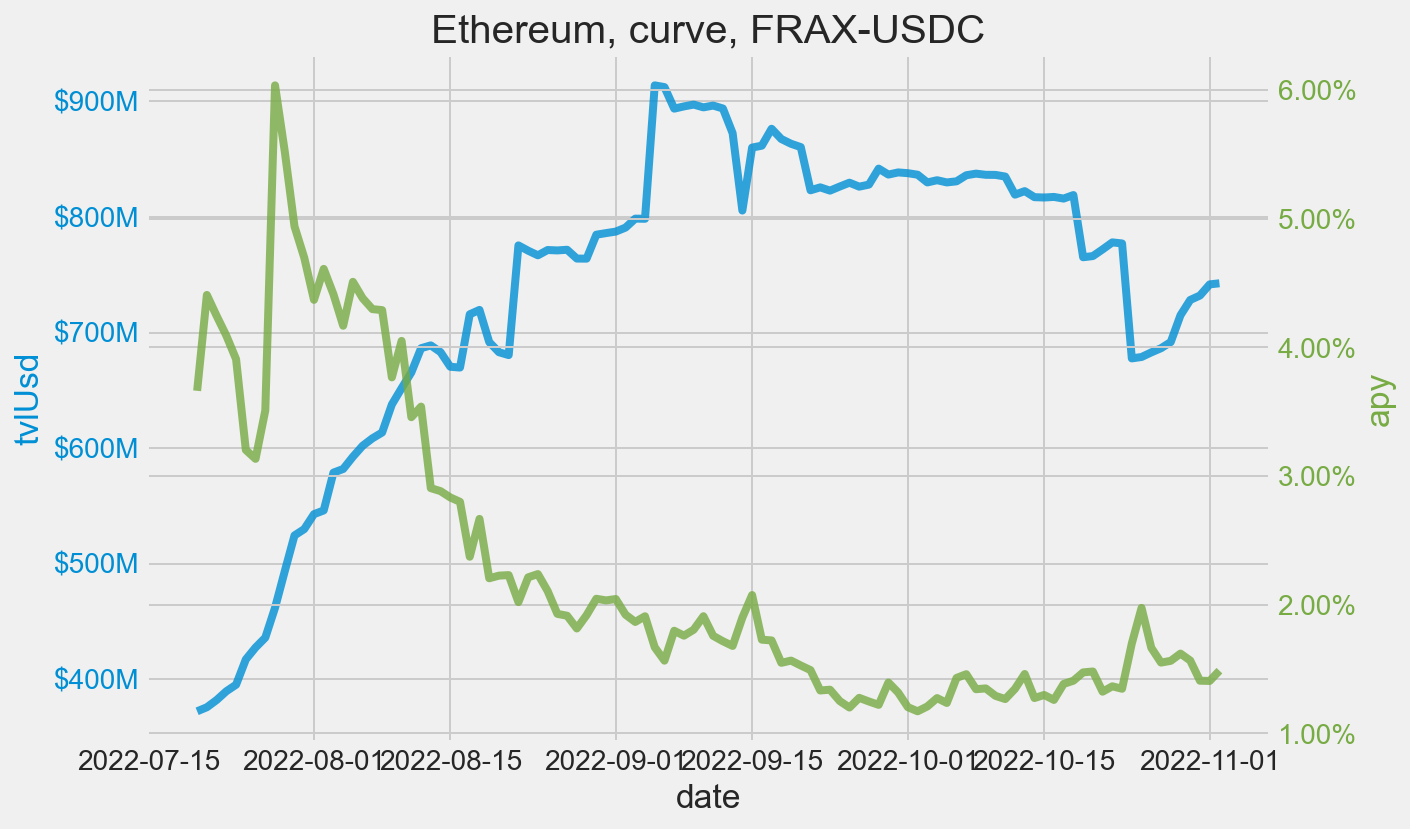

In [7]:
# plot both TVL and APY over time to see their relationships. 
qplt.lineplot_double_yaxes(df, 'tvlUsd', 'apy', left_y_as_usd=True, right_y_as_pct=True, right_y_decimals=2, 
                           title = fig_tit, height=6)
# plt.savefig('dual_yaxes01.png', dpi=300)

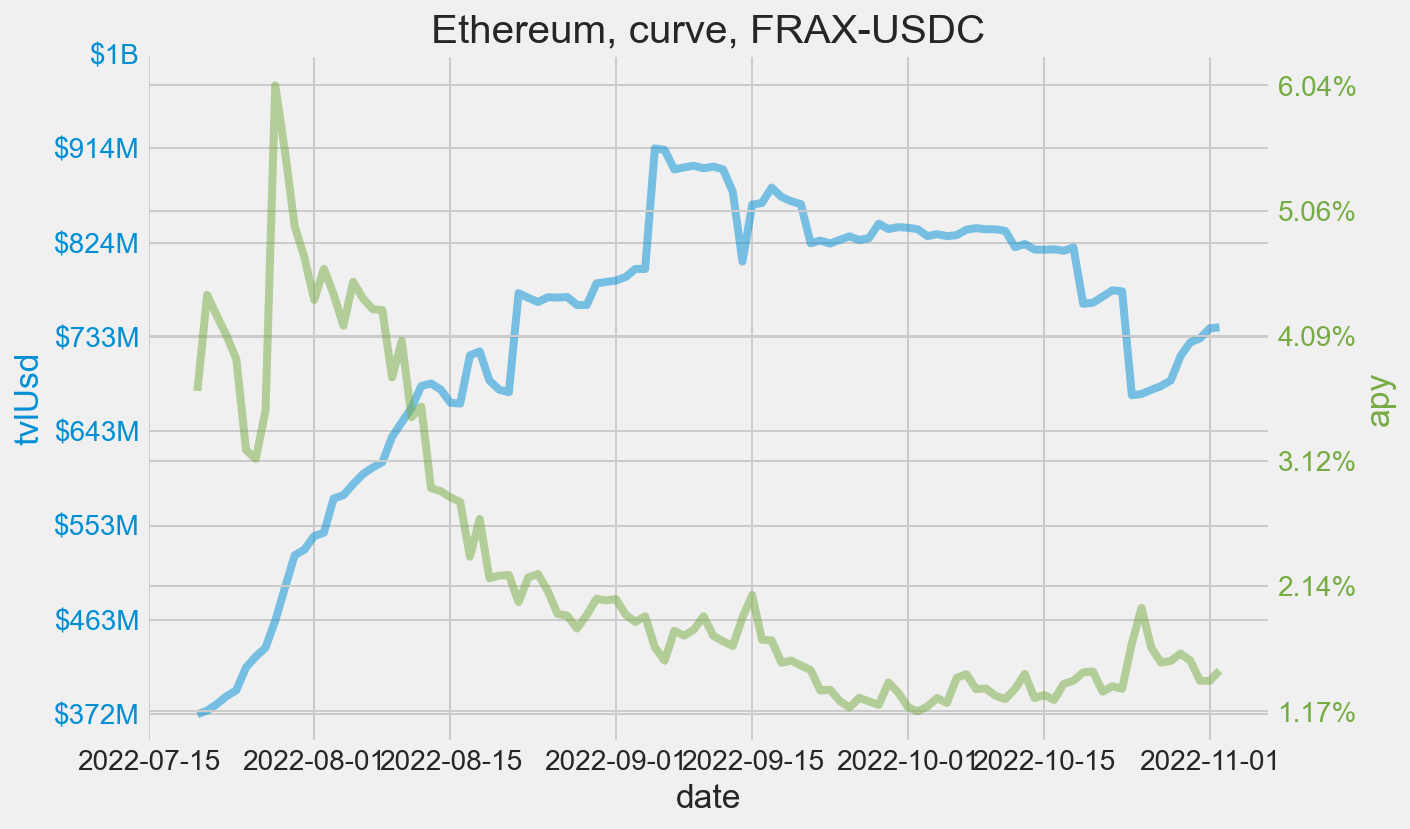

In [8]:
# change the number of left and right y-ticks and transparency level of the curves 
qplt.lineplot_double_yaxes(df, 'tvlUsd', 'apy', left_y_as_usd=True, right_y_as_pct=True, right_y_decimals=2, 
                           right_yticks=5, left_yticks=6, title = fig_tit, alpha=0.5, height=6)
# plt.savefig('dual_yaxes02.png', dpi=300)

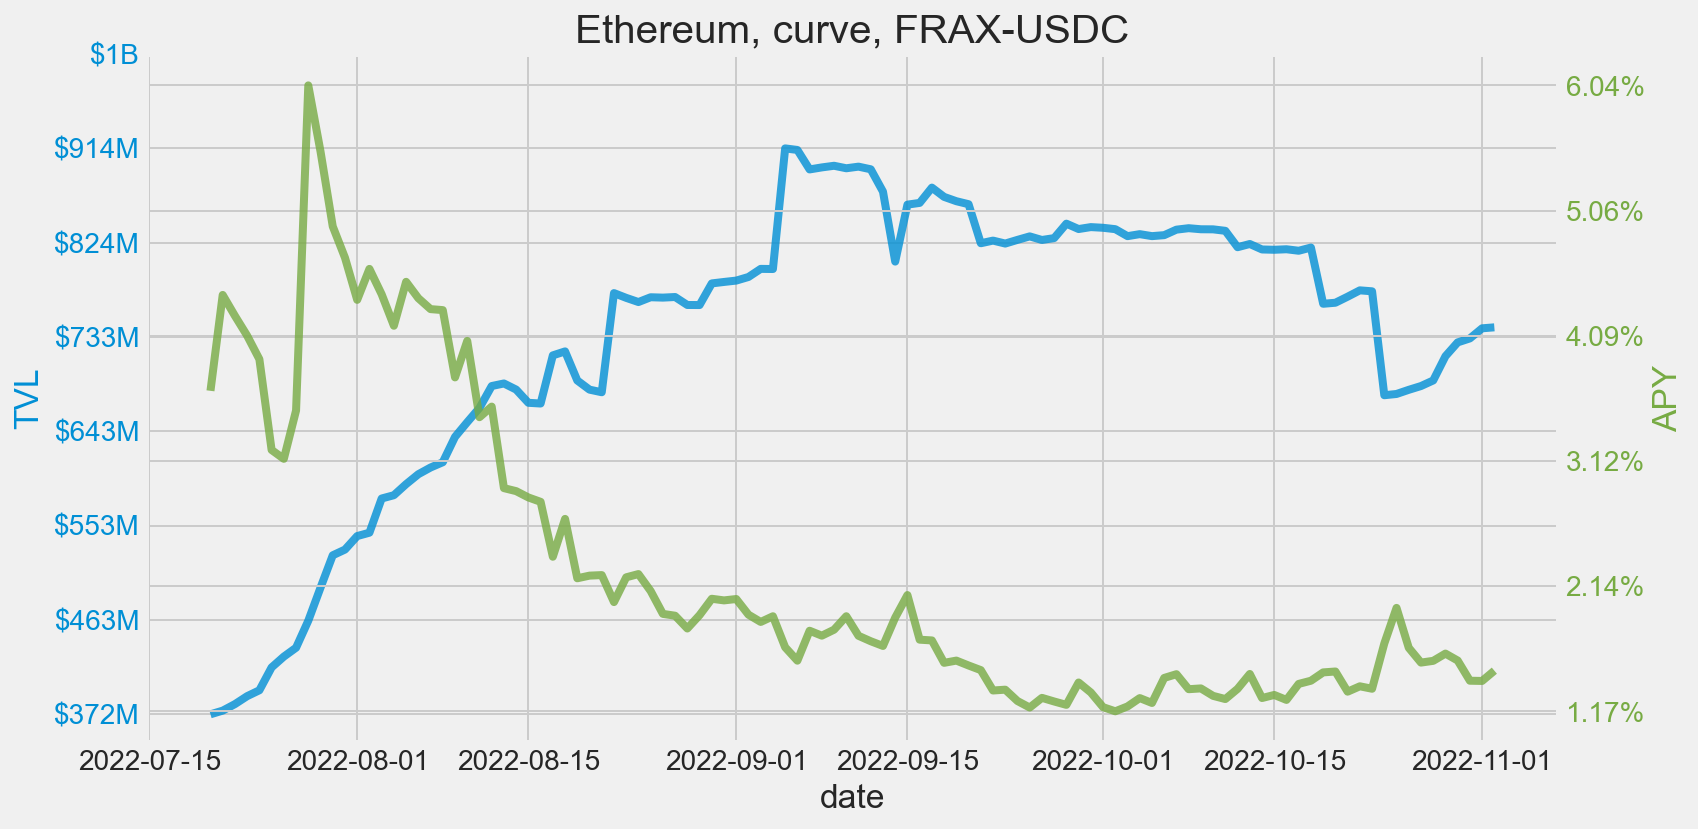

In [9]:
# give xlabel, left and right labels
qplt.lineplot_double_yaxes(df, 'tvlUsd', 'apy', xlab='', left_ylab='TVL', right_ylab='APY',
                           left_y_as_usd=True, right_y_as_pct=True, right_y_decimals=2, 
                           right_yticks=5, left_yticks=6, title = fig_tit, width=12, height=6)
# plt.savefig('dual_yaxes03.png', dpi=300)